In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import msc_project.utils.data_utils as du
import msc_project.utils.fit_NLS as fnls

In [2]:
DATA_PATH = '/scratch/msc24h18/msc_project/data/LBE247_analyzed_2nd_run_only/LBE247_ID301XR1000Oct'
summary_files = du.get_summary_files(DATA_PATH)

data = [(du.read_summary_file(f)) for f in summary_files]

In [3]:
voltages = [e['Pulse Amplitude (V)'].values for _,e in data]
pulse_widths = sorted([float(d['pulseWidth']) for d,_ in data])
unique_voltages = sorted(np.unique(np.concatenate(voltages)))

In [4]:
pulsedata = {p: np.full(len(unique_voltages), np.nan) for p in pulse_widths}
for d, e in data:
    pwidth = float(d['pulseWidth'])
    indices = [unique_voltages.index(v) for v in e['Pulse Amplitude (V)'].values]
    conductance_l = np.array(1 / e['R_high (ohm)'])
    conductance_h = np.array(1 / e['R_low (ohm)'])
    conductance = (conductance_l + conductance_h) / 2
    pulsedata[pwidth][indices] = conductance

# pulsedata['voltage'] = unique_voltages
pulsedata = pd.DataFrame.from_dict(pulsedata)
pulsedata.columns = [f"{p:.0e}" for p in pulse_widths]

pulsedata = pulsedata.clip(lower=0)
pulsedata = pulsedata.div(pulsedata.max().max())

# pulsedata.insert(0, 'voltage', unique_voltages)
pulsedata.index = unique_voltages

pulsedata = pulsedata.transpose()
pulsedata.reset_index(inplace=True, names='Pulse Width')

pulsedata = pulsedata.apply(pd.to_numeric, errors='coerce')

pulsedata.head()


,Pulse Width,-3.5,-3.4,-3.3,-3.2,-3.1,-3.0,-2.9,-2.8,-2.7,...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
0,2.000000e-08,NaN,0.996811,1.000000,0.979269,0.966511,0.949583,0.926889,0.900393,0.869725,...,0.195903,0.177993,0.167198,0.162046,0.150883,0.142787,0.140702,0.135918,0.131133,0.123896
1,5.000000e-08,NaN,0.990677,0.971541,0.972031,0.937071,0.913150,0.893032,0.867026,0.837586,...,0.143646,0.139352,0.136408,0.126840,0.120093,NaN,NaN,NaN,NaN,NaN
2,2.000000e-07,0.908857,0.896835,0.918670,0.900270,0.886408,0.871565,0.861016,0.832924,0.824338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.000000e-07,NaN,NaN,NaN,0.840775,0.833170,0.838567,0.843106,0.831452,0.819799,...,0.095805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.000000e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.836237,0.828508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


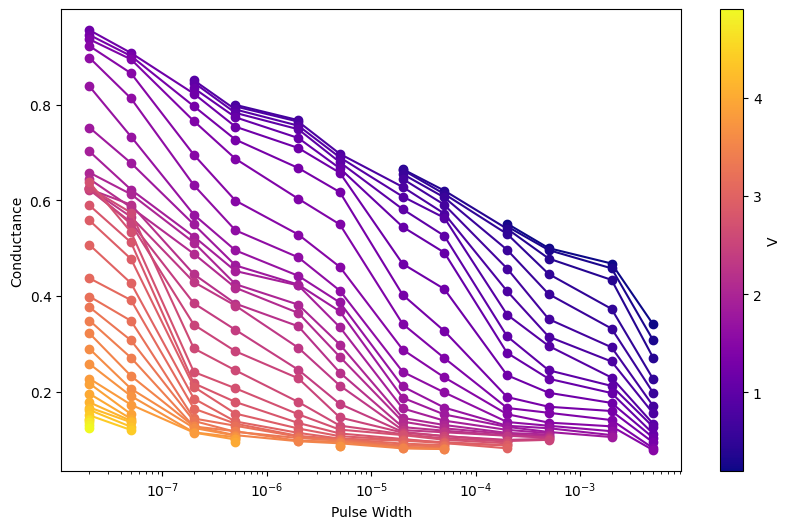

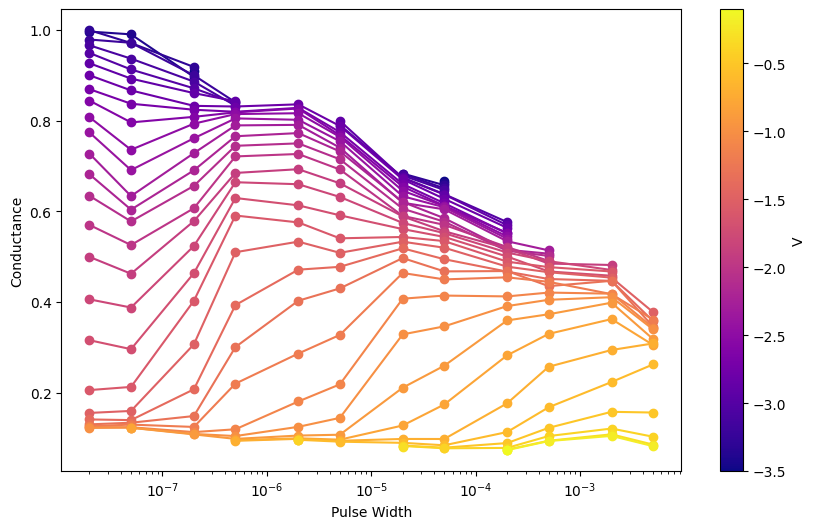

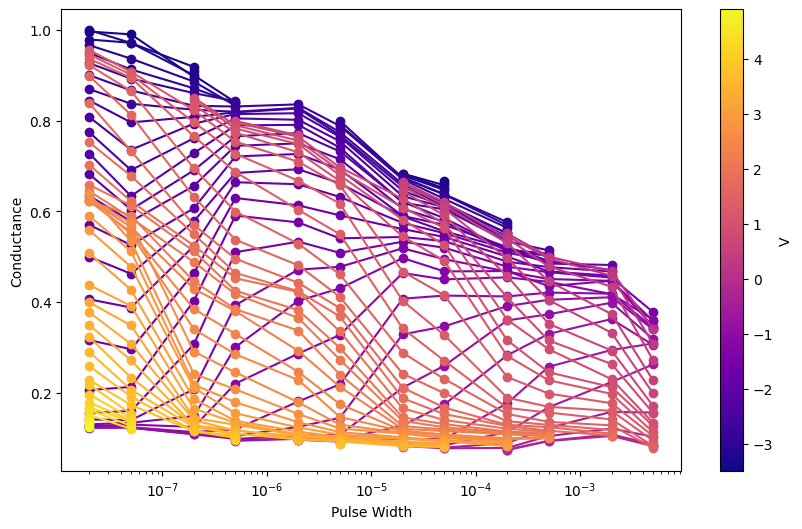

In [7]:
neg_voltages = [v for v in unique_voltages if v < 0]
pos_voltages = [v for v in unique_voltages if v > 0]

posdata = pulsedata.drop(columns=neg_voltages)
negdata = pulsedata.drop(columns=pos_voltages)

fig, ax = plt.subplots(figsize=(10, 6))
fnls.plot_all(posdata, ax=ax, fit=False)
ax.set(xlabel = 'Pulse Width', ylabel='Conductance', xscale='log')
plt.savefig('/scratch/msc24h18/msc_project/results/nls_model/nls_LBE247_pos.png')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
fnls.plot_all(negdata, ax=ax, fit=False)
ax.set(xlabel = 'Pulse Width', ylabel='Conductance', xscale='log')
plt.savefig('/scratch/msc24h18/msc_project/results/nls_model/nls_LBE247_neg.png')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
fnls.plot_all(pulsedata, ax=ax, fit=False)
ax.set(xlabel = 'Pulse Width', ylabel='Conductance', xscale='log')
plt.savefig('/scratch/msc24h18/msc_project/results/nls_model/nls_LBE247.png')
plt.show()